## 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path

path = r'C:\Users\Frederick\Documents\07-12-2023 Instacart Basket Analysis'

## 02. Import data

In [3]:
# Import data for orders_products merged with flags

ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flags.pkl'))

## 03. Exercise - Part 1

<Axes: xlabel='orders_day_of_week'>

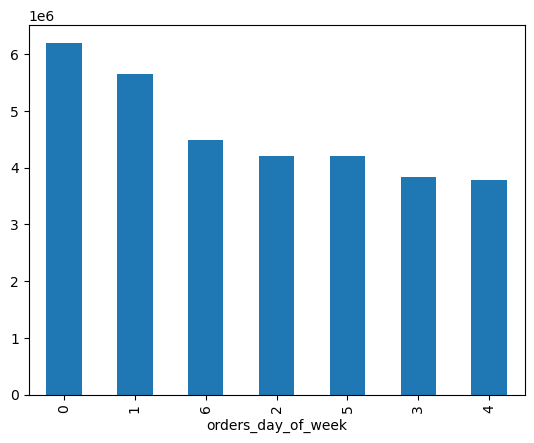

In [5]:
# Create a bar chart

ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

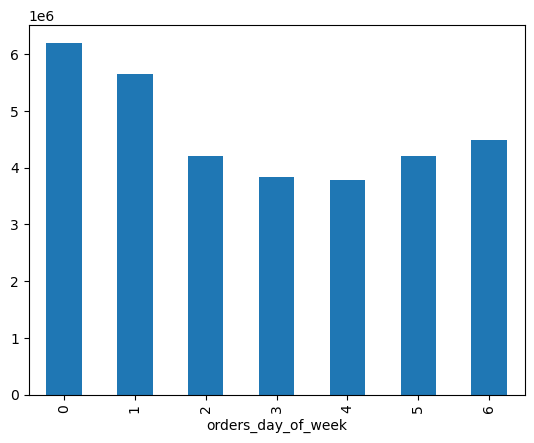

In [6]:
# Create a bar chart with sort_index

ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

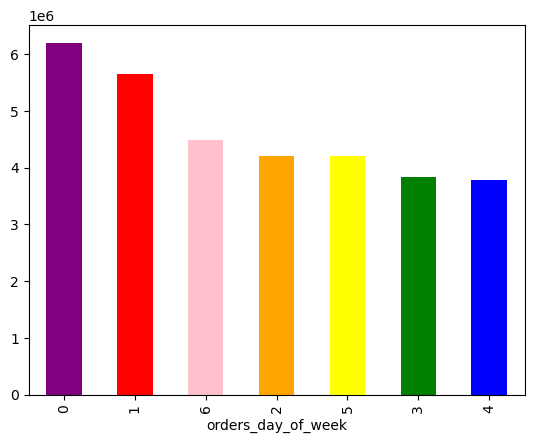

In [7]:
# Create a bar chart with colours

bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [8]:
# Saving bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

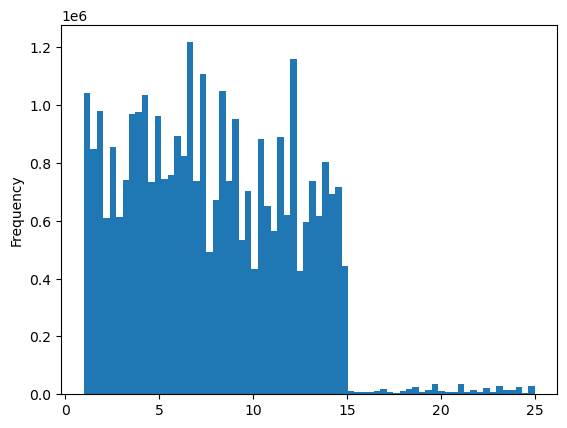

In [23]:
# Creating histogram on prices column

hist = ords_prods_merged['prices'].plot.hist(bins = 70)

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

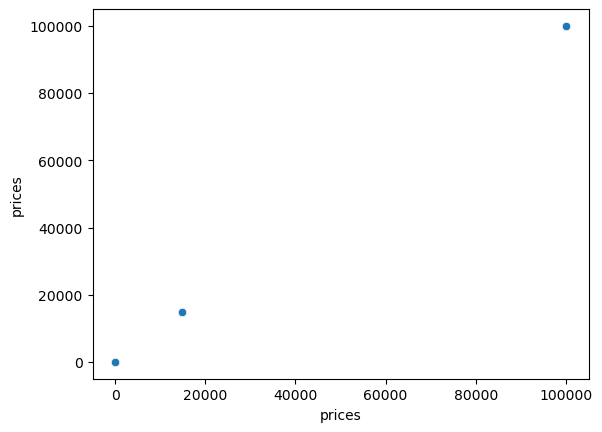

In [11]:
# Creating scatterplot on prices column

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [16]:
# Filter price column for value greater than 100 for further exploration

ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id  user_order_number  \
10030345           171           171    912404       17                 12   
10030346           181           181    603376       17                 22   
10030347          1944          1944   3264360      135                  2   
10030348          1945          1945    892534      135                  3   
10030349          5708          5708    229704      342                  8   
10030350          9756          9756   2856927      618                  2   
10030351          9757          9757   1871776      618                  3   
10030352         10602         10602   2575782      658                 19   
10030353         10604         10604    642211      658                 21   
10030354         10613         10613    591140      658                 30   
10030355         10615         10615   1116834      658                 32   
10030356         13356         13356    260601      846                  2   
10030357         13815         13815    573149      866                  4   
10030358         13816         13816   2589688      866                  5   
10030359         13817         13817    525880      866                  6   
10030360         13818         13818    265986      866                  7   
10030361         13819         13819   2920240      866                  8   
10030362         13820         13820    500920      866                  9   
10030363         13821         13821   1457337      866                 10   
10030364         13822         13822   1916506      866                 11   
10030365         13823         13823   1258862      866                 12   
10030366         13824         13824   2881244      866                 13   
10030367         13825         13825    379654      866                 14   
10030368         14738         14738    156071      917                  7   
10030369         14739         14739   2884554      917                  8   
10030370         14740         14740   1983147      917                  9   
10030371         14742         14742      3245      917                 11   
10030372         14747         14747   2772015      917                 16   
10030373         14750         14750   1209345      917                 19   
10030374         15336         15336   1496387      962                  5   
10030375         16797         16797   3376430     1032                  1   
10030376         16799         16799   2309971     1032                  3   
10030377         16905         16905   1303175     1040                  3   
10030378         18651         18651    694349     1162                  9   
10030379         19779         19779   2606341     1227                  2   
10030380         20765         20765   2920834     1284                  8   
10030381         20766         20766    280039     1284                  9   
10030382         24261         24261   1435153     1519                 26   
10030383         24267         24267   1066435     1519                 32   
10030384         27385         27385   1234215     1702                  6   
10030385         27389         27389    618635     1702                 10   
10030386         29671         29671    223891     1829                  6   
10030387         30552         30552    682835     1875                  2   
10030388         31384         31384   3242848     1941                  4   
10030389         31405         31405   2224211     1941                 25   
10030390         33390         33390    422540     2056                  6   
10030391         39073         39073   1697208     2409                 33   
10030392         39945         39945    579854     2466                  7   
10030393         43906         43906   2716179     2700                  7   
10030394         44825         44825    461261     2768                 10   
10030395         45685         4

In [15]:
# Remove the limit on display option on columns

pd.options.display.max_columns = None

In [17]:
# Assign missing values to suspected outliers in prices

ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [18]:
# Check max value on prices

ords_prods_merged['prices'].max()

25.0

In [24]:
# Saving histogram chart

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [25]:
# Creating a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [26]:
# Checking output on the new list 'dev'

dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merged[dev]

In [28]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merged[~dev]

In [29]:
# Checking total count for orders_products full dataframe

len(ords_prods_merged)

32404859

In [30]:
# Checking total count for big & small sampling

len(big) + len(small)

32404859

In [31]:
# Reduce samples to only include necessary columns

df_2 = small[['orders_day_of_week','prices']]

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

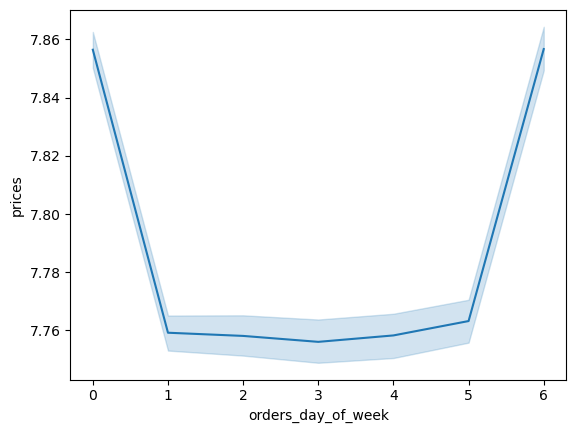

In [32]:
# Create line chart from sample data

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [33]:
# Saving line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_days_of_week.png'))